연습문제

📝 문제 1

In [5]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [6]:
# 그래프 초기화
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(fpath)
fprop = fm.FontProperties(fname = fpath)
fname = fprop.get_name()




plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False


In [7]:
origin = load_data('wage')
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [20]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


In [8]:
education = sorted(list(origin['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

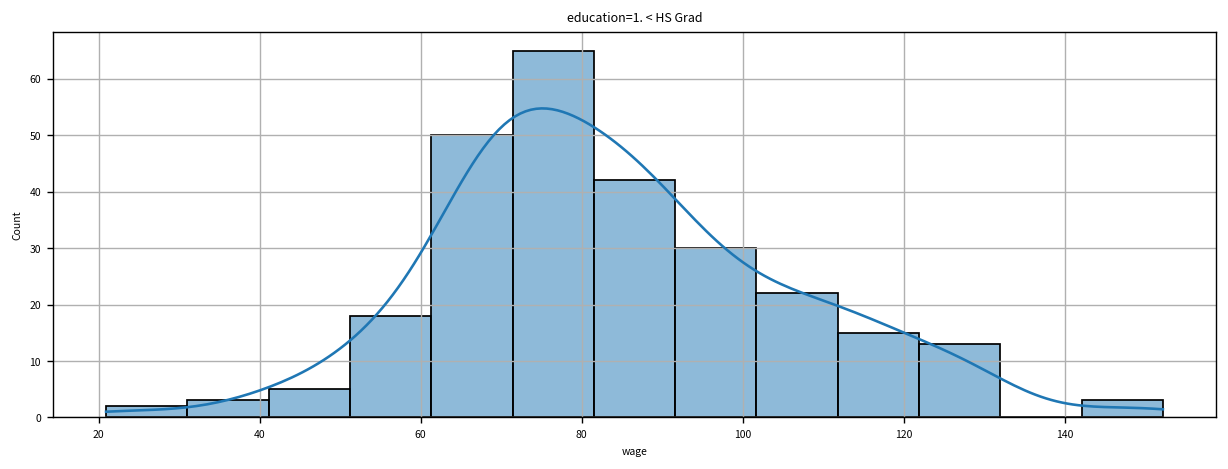

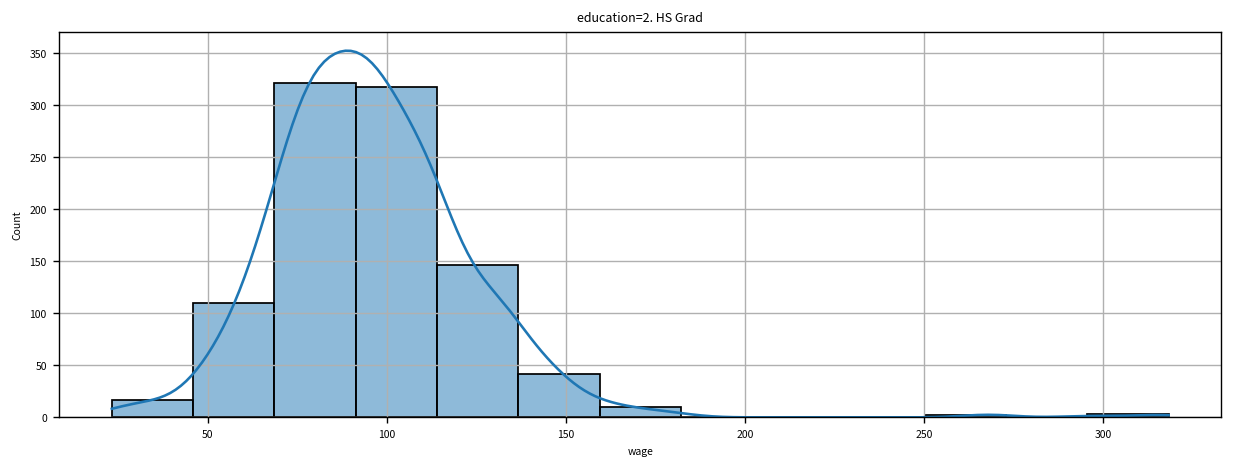

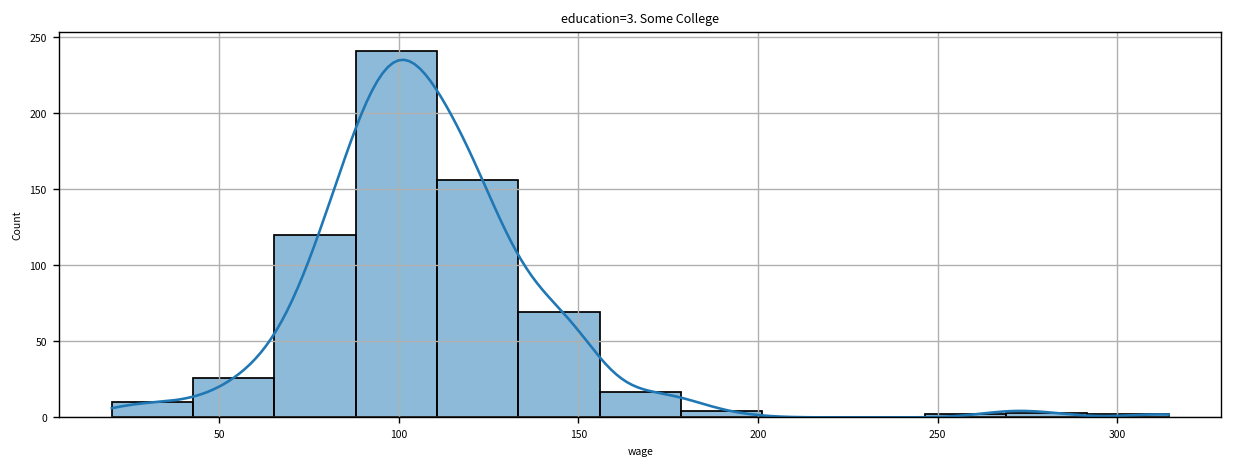

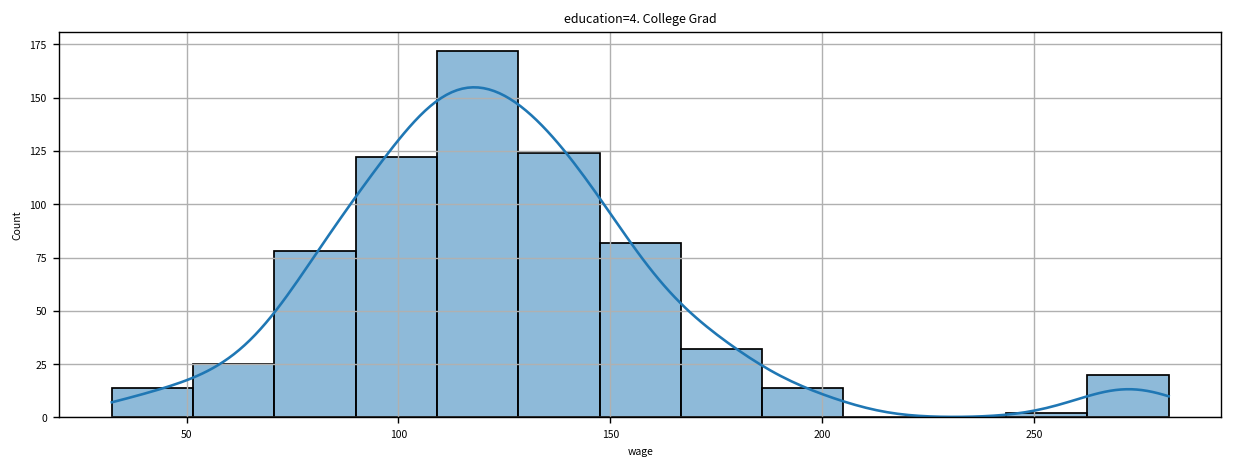

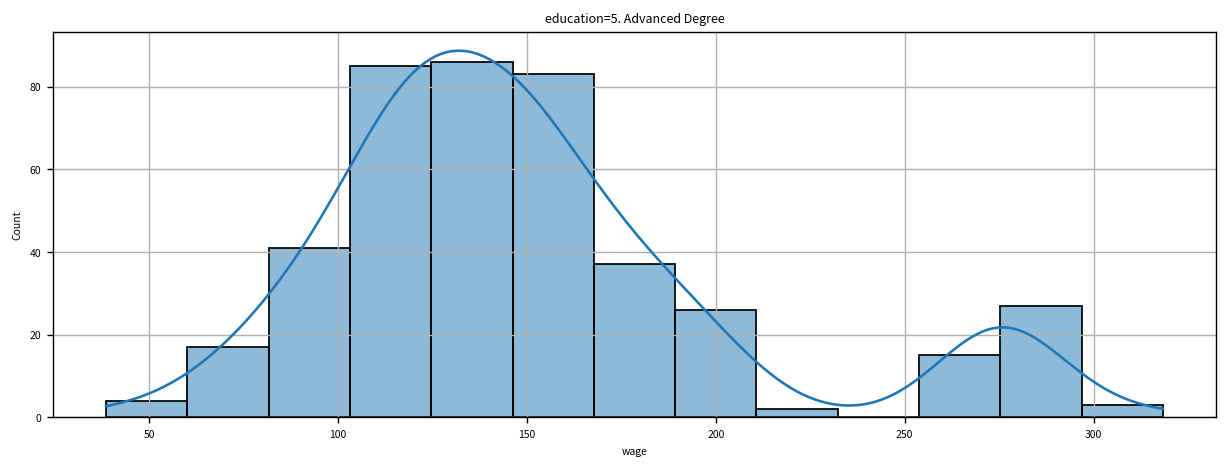

In [10]:
bins_count = 13

for e in education:
    df = origin.query("education == @e")

    
    plt.figure(figsize=(12,4), dpi = 125)

    sb.histplot(data=df, x = "wage", bins = bins_count, 
                 kde = True)
           
    

    plt.title(f"education={e}")
    plt.grid()
    plt.show()
    plt.close()

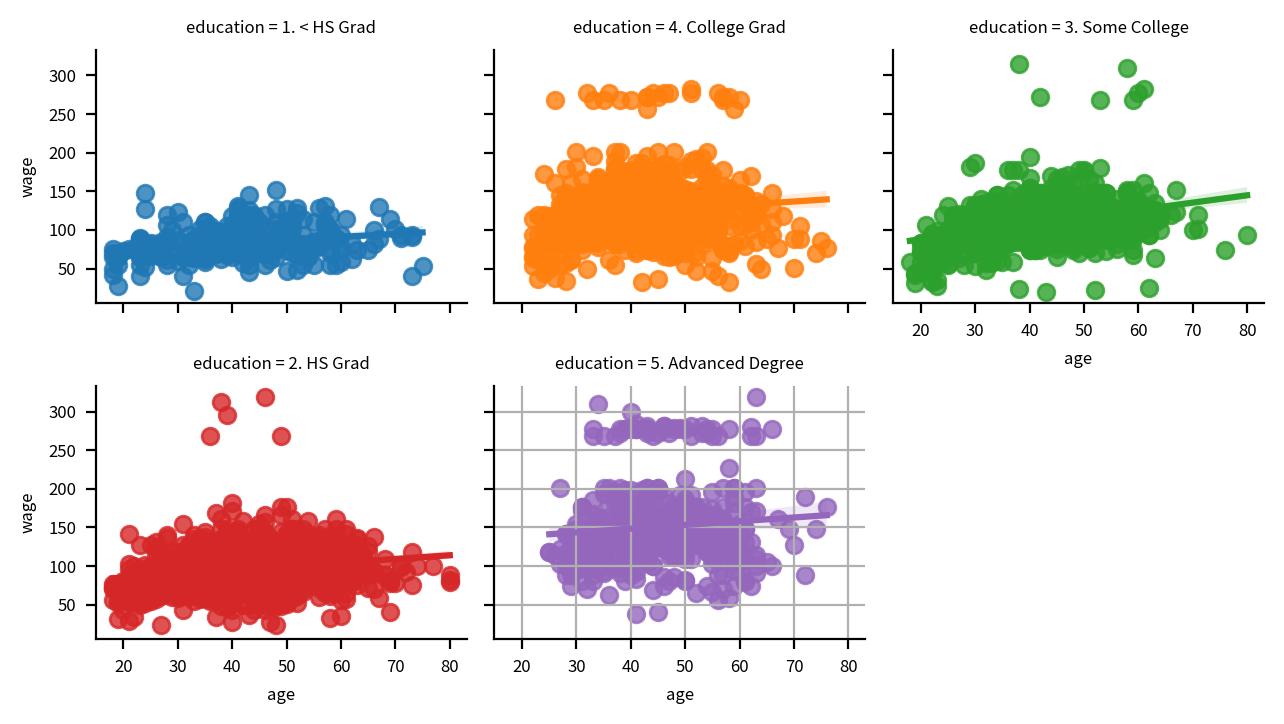

In [ ]:
# 쌤
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)

# 그래프 그리기->seaborn 사용
g = sb.lmplot(data=origin, x="age", y ='wage', hue='education', col='education',col_wrap=3)
           
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])


plt.grid()

plt.tight_layout()
plt.savefig("plot.png", dpi=my_dpi*2)
plt.show()
plt.close()


-전반적으로 나이가 많아질수록 임금이 상승하는 경향을 보인다.
-교육 수준이 높을 수록 임금이 더 높은 경향을 보인다.

📝 문제 2

In [18]:
race = sorted(list(origin['race'].unique()))
race

['1. White', '2. Black', '3. Asian', '4. Other']

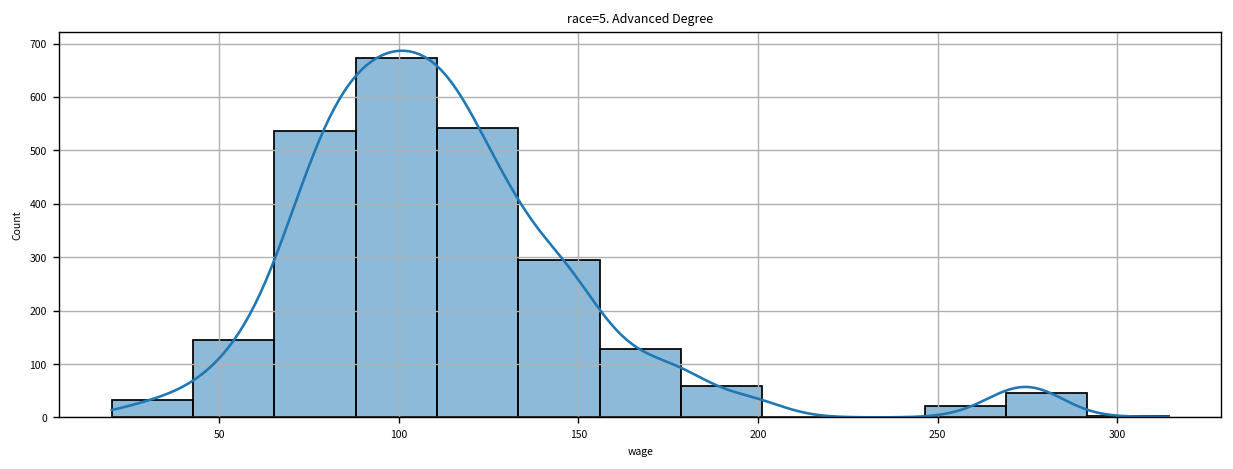

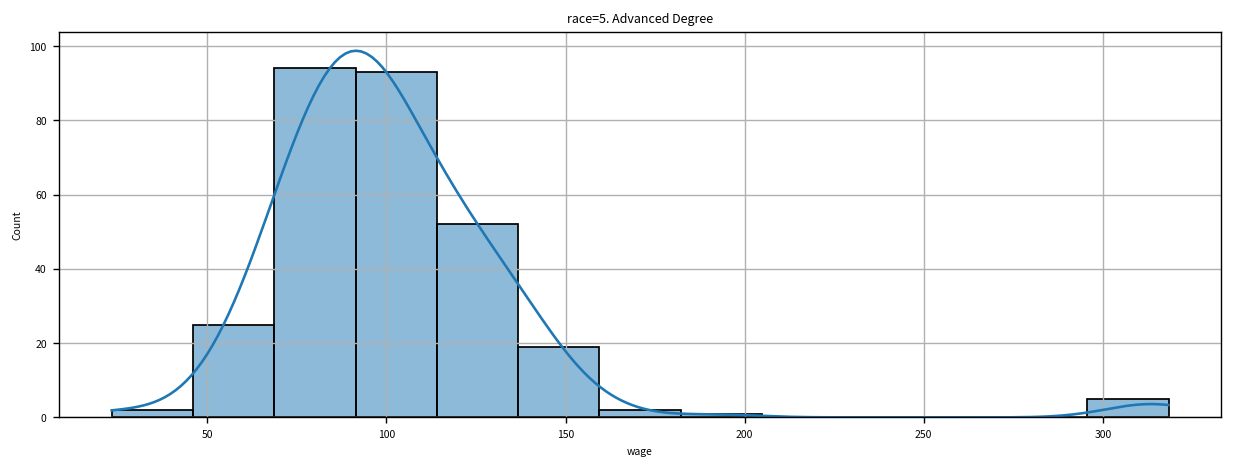

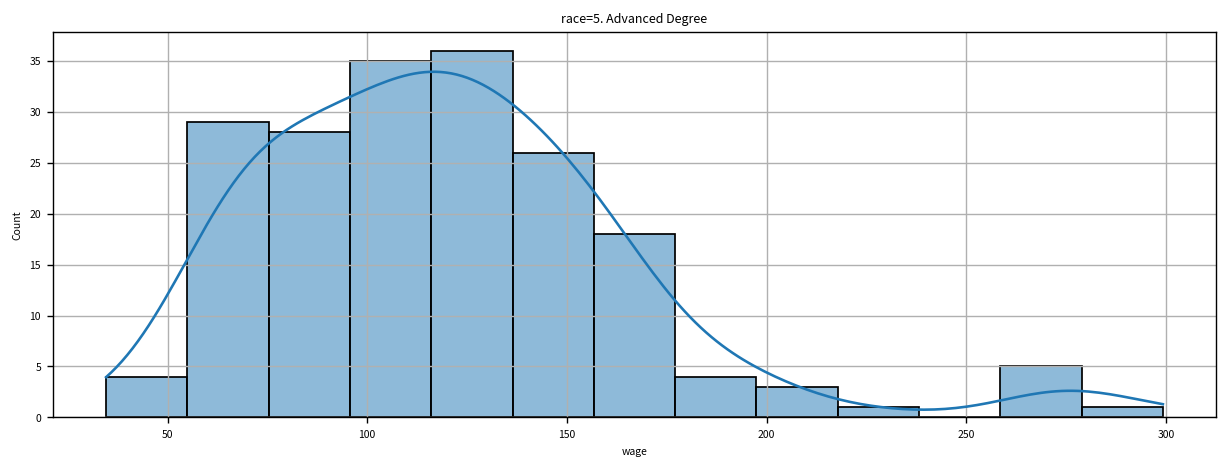

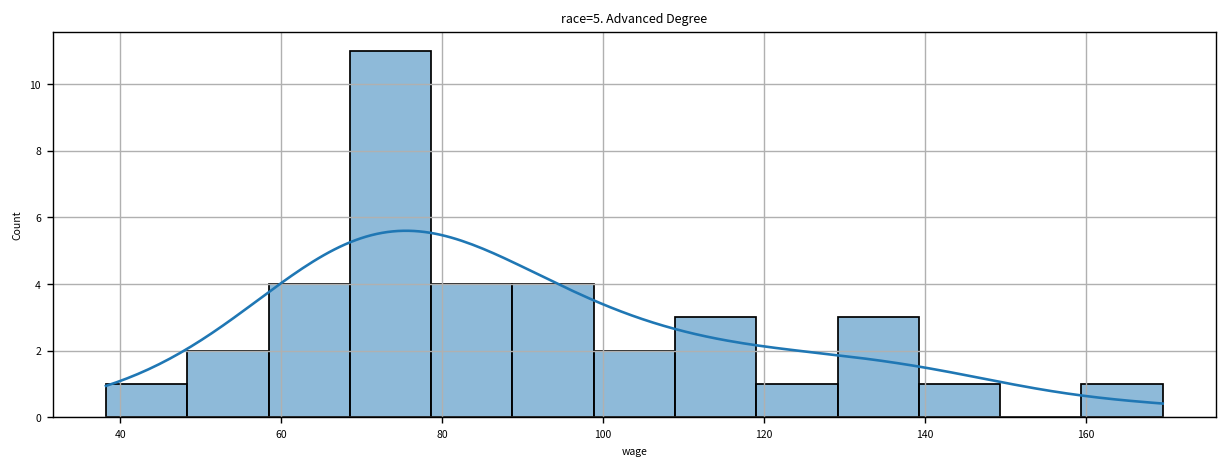

In [22]:
bin_count = 13

for r in race:
    df = origin.query("race == @r")

    
    plt.figure(figsize=(12,4), dpi = 125)

    sb.histplot(data=df, x = "wage", bins = bins_count, 
                 kde = True)
           
    

    plt.title(f"race={e}")
    plt.grid()
    plt.show()
    plt.close()

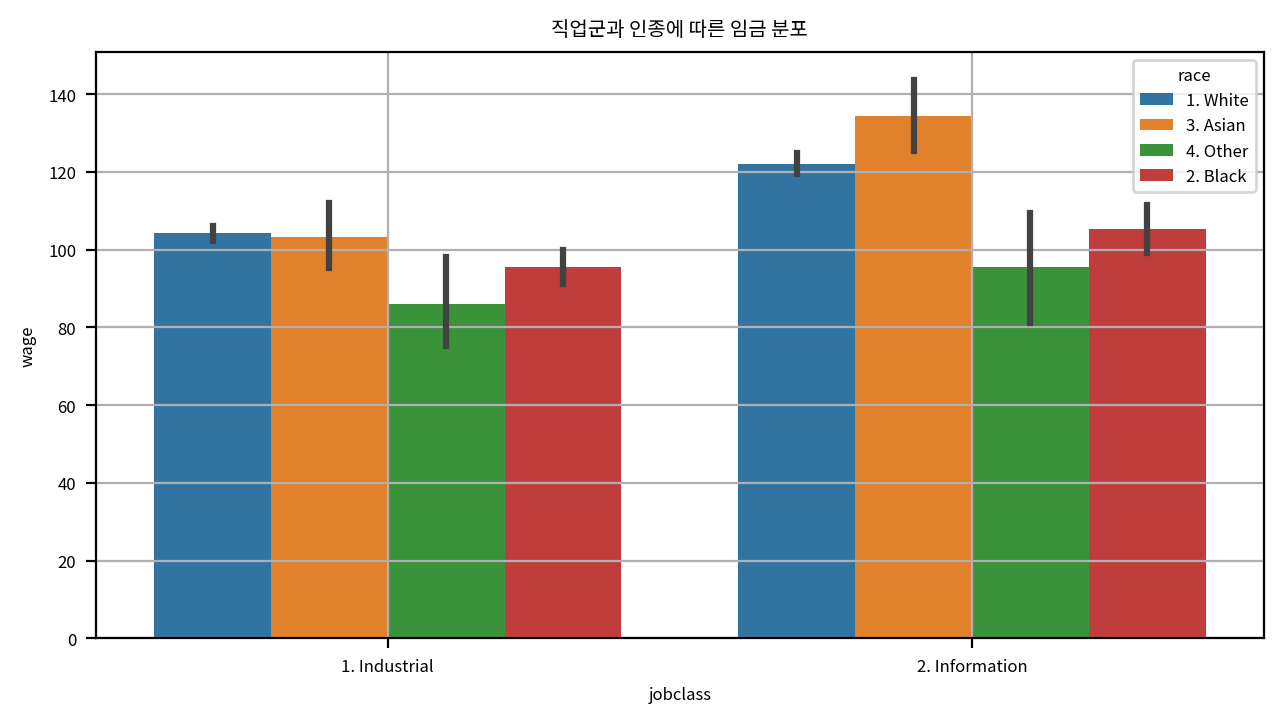

In [25]:
# 쌤
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols, figsize = figsize, dpi = my_dpi)
# 그래프 그리기->seaborn 사용
sb.barplot(data=origin, x="jobclass", y ='wage', hue='race')
           


ax.set_title("직업군과 인종에 따른 임금 분포")
ax.grid(True)

plt.tight_layout()

plt.show()
plt.close()

#Information(사무직) 직군이 Industrial(생산직) 직군보다 전반적으로 임금 중앙값이 높게 나타난다.
#White와 Asian 인종은 두 직군 모두 Black이나 Other 인종보다 높은 임금 분포를 보인다.
#Asian 인종은 Information 직군에서 임금(200이상)을 받는 다른 인종에 비해 두드러진다.
#Black 인종은 두 직군 모두에서 임금 분포가 비교적 낮은 쪽에 집중되어 있다. 

📝 문제 3

In [27]:
year = (list(origin['year'].unique()))
year

[np.int64(2006),
 np.int64(2004),
 np.int64(2003),
 np.int64(2005),
 np.int64(2008),
 np.int64(2009),
 np.int64(2007)]

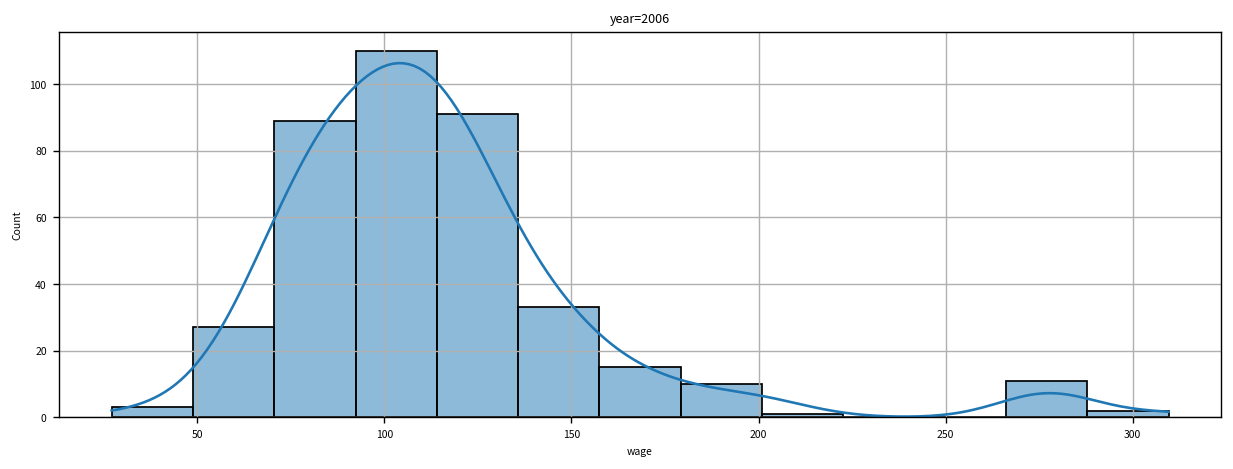

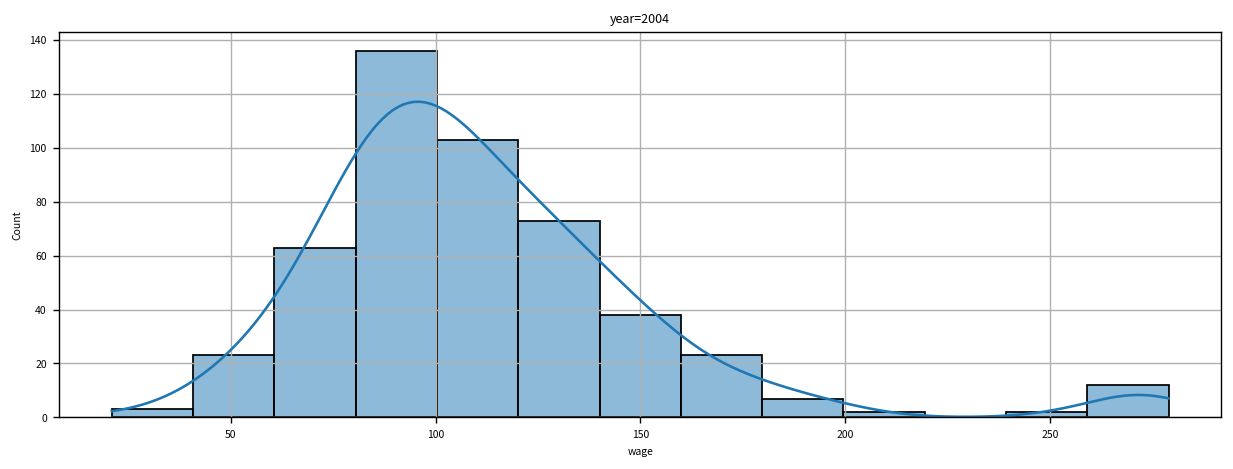

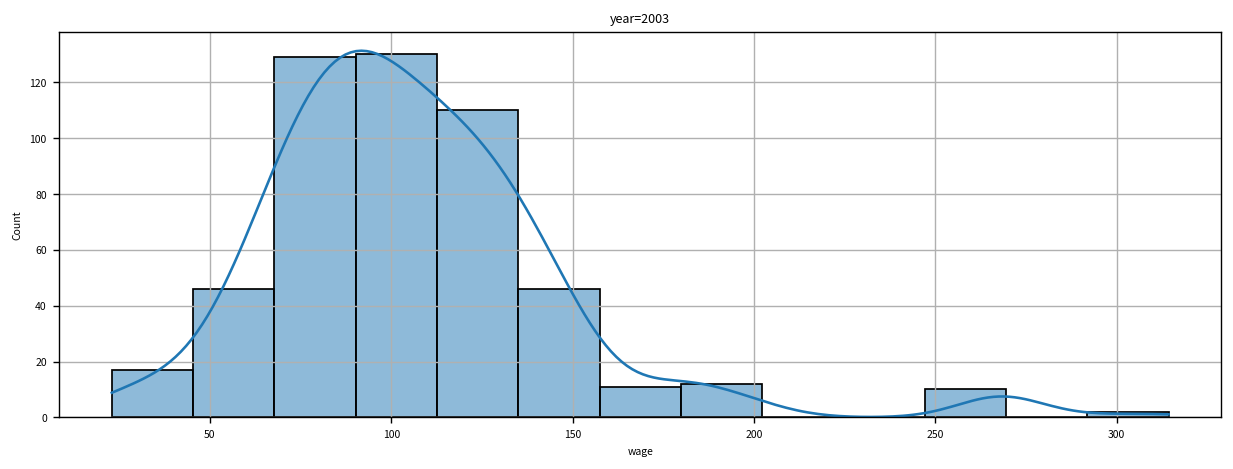

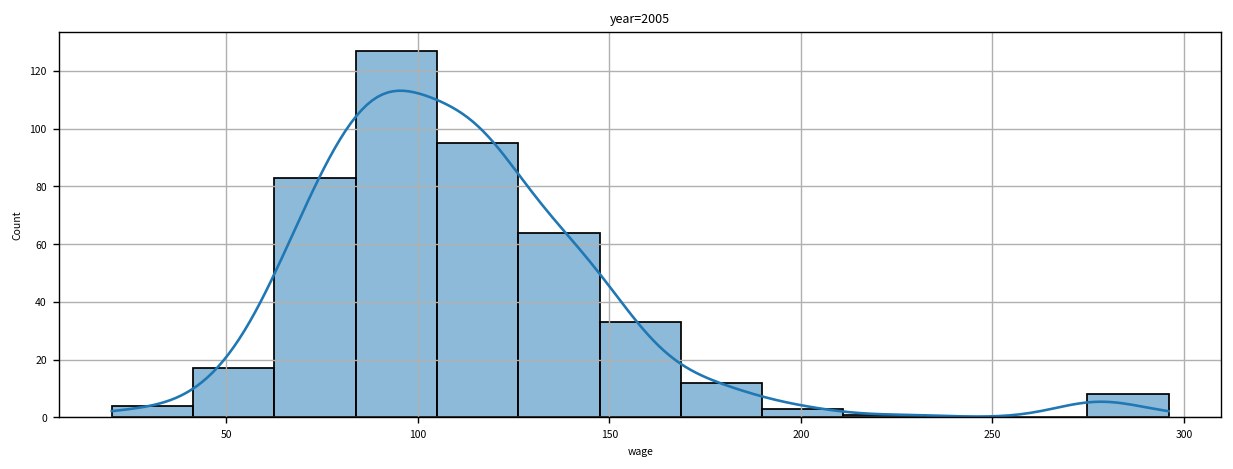

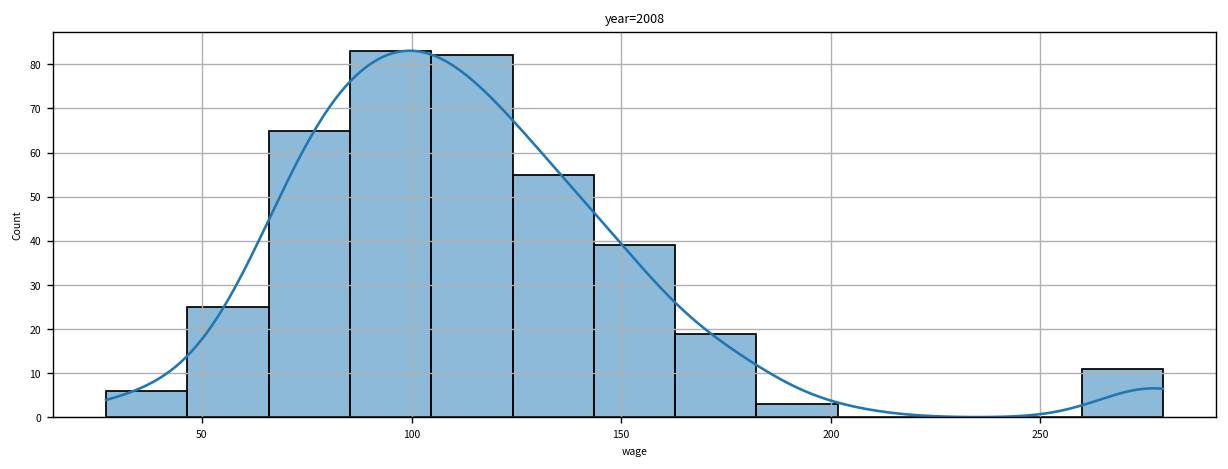

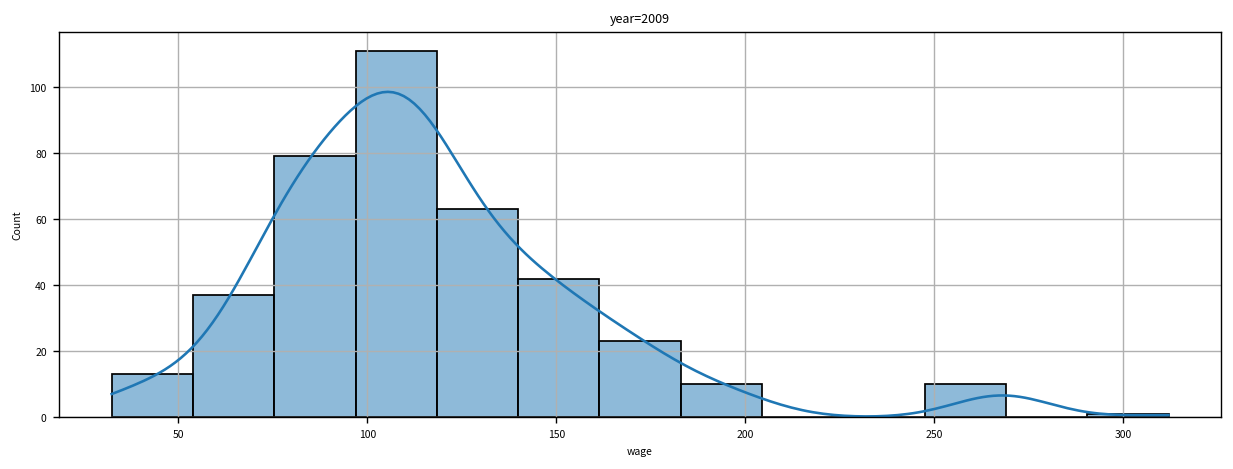

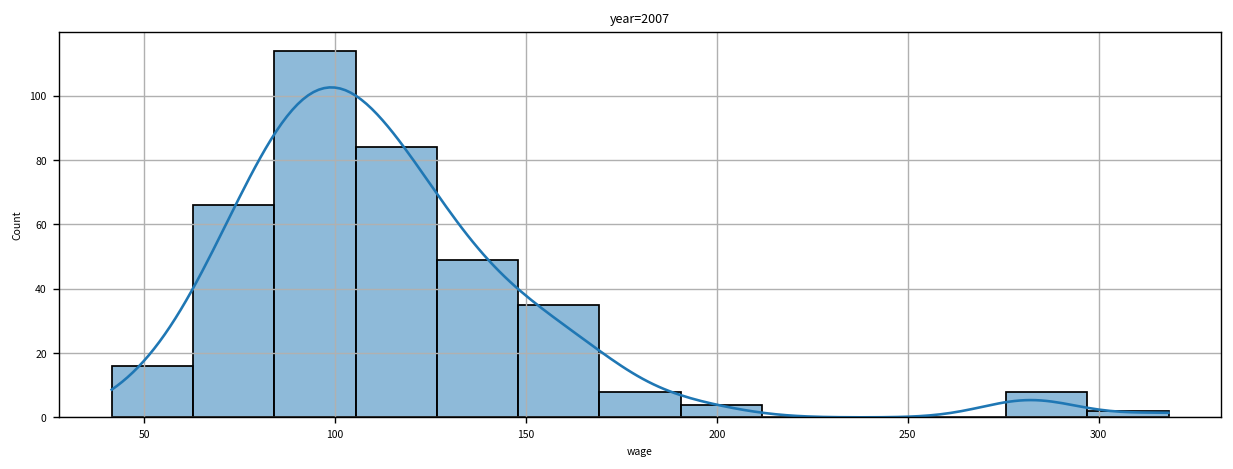

In [29]:
bin_count = 13
for y in year:
    df = origin.query("year == @y")

    
    plt.figure(figsize=(12,4), dpi = 125)

    sb.histplot(data=df, x = "wage", bins = bin_count, 
                 kde = True)
           
    

    plt.title(f"year={y}")
    plt.grid()
    plt.show()
    plt.close()


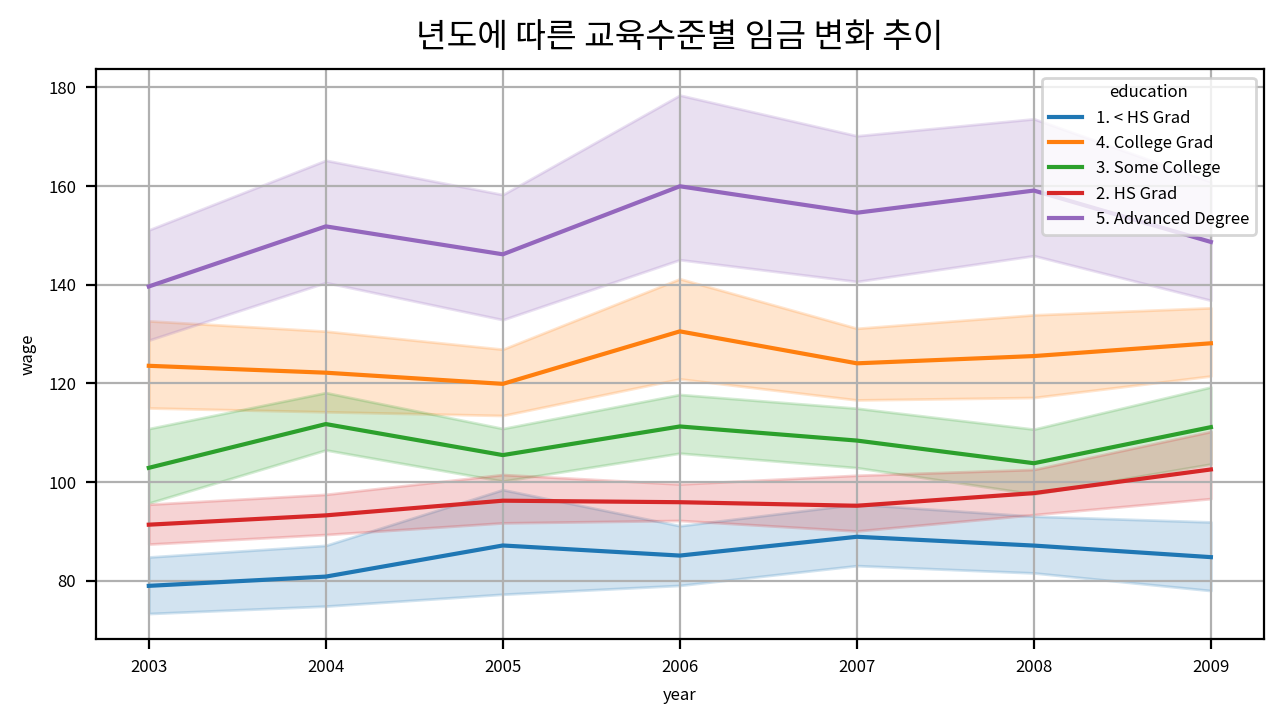

In [32]:
# 쌤
width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols, figsize = figsize, dpi = my_dpi)
# 그래프 그리기->seaborn 사용
sb.lineplot(data=origin, x="year", y ='wage', hue='education')
           


ax.set_title("년도에 따른 교육수준별 임금 변화 추이", fontsize = 12, pad = 8 )
ax.grid(True)

plt.tight_layout()
plt.show()
plt.close()

#대학원 졸업 집단의 경우 2008년까지 임금이 상승하다가 2009년도에 하락하고 있다. 이는 2008년 금융위기 영향인 것으로 보인다.
#대학원 졸업 집단의 경우 임금이 다른 집단에 비해 월등히 높으며, 연도에 따른 임금 상승률도 가장 가파르다. 또한, 2008년까지 대체로 임금이 상승하다가 2009년도에 하락하고 있다. 이는 2008년 금융위기의 영향인 것으로 보인다.
#'< HS Grad' (고등학교 미만) 집단은 다른 집단에 비해 임금 수준이 가장 낮고, 연도에 따른 임금 변화도 거의 없다. 